<a href="https://colab.research.google.com/github/GeorgeKMaina/MCHEZO-PESA-MACHINE-LEARNING-PREDICITION/blob/main/mchezo_pesa_game_results_predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MCHEZO PESA GAME RESULTS PREDICTION USING

###1. Defining the research objective

##### a) Specifying the Data Analytic Questions

1. To select the best three variables that can be used to identify a win, draw or loss

2. To predict if a game was a win or a loss from the home sides perspective
3. To predict the score of both home and away team

##### b) Stating the Model Used

1. Linear Discriminant Analysis to select the top three features that can help us explain whether a game is a win, draw or a loss
2. Logisitc Regression to predict wether a game was a win,draw or a loss from the home team perspective
3. Polynomial Regression to predict the number of goals scored by both home and away teams

### 2. Recording the Experimental Design

##### a) Coming up with a research question

What are the best three variables that can be used to identify a win, draw or loss ?

#####b) Cleaning the Dataset by deleting outliers, renaming messy column names, dropping observations with anomalies, dropping columns that will not be useful in the analysis

#####c) Carrying out univariate, bivariate, multivariate analysis

#####d) Modelling to get our predictions

###3. Metrics of success

##### To have a model with a good performance measure. The performance will be from the mtrics of success of the model which in this case is the confusion matrix

###4. Relevance of the Dataset 

The Dataset contains annual records of football games played in different tournaments.

Some of the columns included are name of home team, name of the away team, goals scored by both home and away team, country and city where the games were played in.

The Dataset provided has the necessary columns that can enable us know if the game was won, lost, drawn.

#IMPORTING THE NECESSARY LIBRARIES THAT WE WILL USE

In [1]:
# libraries for reading the dataset & data cleaning
import pandas as pd
import numpy as np
#libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
#libraries to use in modelling
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

#metric to asses the performance of the model
from sklearn.metrics import confusion_matrix

#LOADING THE DATASET AND VIEWING SOME ASPECTS OF IT

In [2]:
#loading the datasets that we will use for the analysis
#we will first load the first dataset and create a copy of it
result=pd.read_csv('/content/results.csv')
results=result.copy() # creating a copy of the dataset

#we will then creatre a second dataset and create a copy of it
fifarankings=pd.read_csv('/content/fifa_ranking.csv')
fifaranking=fifarankings.copy()
# loading a dataset with descriprion of the columns
description=pd.read_excel('/content/column descriptions details.xlsx',header=None)
description.rename(columns={0:'Columns',1:'Description of column contents'},inplace=True)

In [3]:
description

,Columns,Description of column contents
0,Date,date of the match
1,Home_team,the name of the home team
2,Away_team,the name of the away team
3,Home_score,full-time home team score including extra time...
4,Away_score,full-time away team score including extra time...
5,Tournament,the name of the tournament
6,City,the name of the city/town/administrative unit ...
7,Country,the name of the country where the match was pl...
8,Neutral,TRUE/FALSE column indicating whether the match...


### Results DataFrame

In [4]:
print('shape of the results dataset:',results.shape)
print('results dataset has ' + str(results.shape[0]) + ' rows and ' + str(results.shape[1]) +' columns')

shape of the results dataset: (40839, 9)
results dataset has 40839 rows and 9 columns


In [5]:
#results first 5 rows
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
#results dataframe last rows
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [7]:
print(' column names, number of observations dtypes of the columns')
print('\n')
results.info()

 column names, number of observations dtypes of the columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


### Fifa Rankings DataSet

In [8]:
#we will look for the shape of the dataframe
print('fifaranking dataset has ' + str(fifaranking.shape[0]) + ' rows and ' + str(fifaranking.shape[1]) + ' columns' )

fifaranking dataset has 57793 rows and 16 columns


In [9]:
#first 5 rows of the dataset
fifaranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [10]:
#fifa ranking last rows
fifaranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [11]:
print(' column names, number of observations dtypes of the columns')
print('\n')
fifaranking.info()

 column names, number of observations dtypes of the columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago

# DATA CLEANING

### Results DataFrame

#### Consistency

In [12]:
#we will look for rows with duplicated records
results.duplicated().sum()

0

#### Completness

In [13]:
#we will look for columns with missing values
results.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

#### Validity

In [14]:
#we will convert the date from object class into datetime
results['date']=pd.to_datetime(results['date'], infer_datetime_format=True)

In [15]:
# we will create a new column with year values
results['year']=results['date'].dt.strftime('%Y')
results['month']=results['date'].dt.strftime('%m')

In [16]:
#we will create two other columns which are goal difference and another to show if the game was a win,draw or a loss
#getting the goal difference between the two team. The values obtained will be populated in a new column
results['goal_difference']=results['home_score']-results['away_score']

#creating another column to show the status of the match.
#the status is in reference from the home team
matchstatus=[]
for i in results['goal_difference']:
  if i>0:
    matchstatus.append('Win')
  elif i==0:
    matchstatus.append('Draw')
  else:
    matchstatus.append('Loss')

results['matchstatus']=matchstatus
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,goal_difference,matchstatus
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,03,2,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,03,1,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,03,0,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,03,3,Win


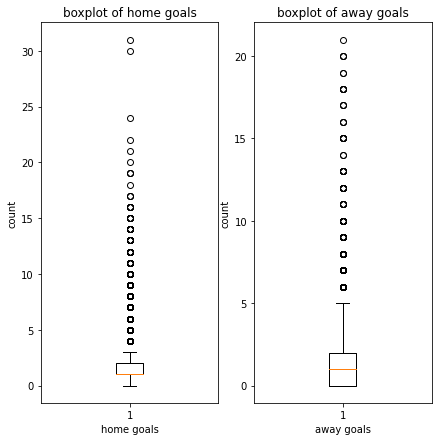

In [17]:
plt.figure(figsize=(7,7))
#subplot 1
plt.subplot(121)
plt.title('boxplot of home goals')
plt.boxplot(results['home_score'])
plt.xlabel('home goals')
plt.ylabel('count')

#subplot 2
plt.subplot(122)
plt.title('boxplot of away goals')
plt.boxplot(results['away_score'])
plt.xlabel('away goals')
plt.ylabel('count')

plt.show()

In [18]:
#accessing the column with outlier values
results.loc[(results['home_score']>4)|(results['away_score']>5)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,goal_difference,matchstatus
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,1878,03,5,Win
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,1878,03,9,Win
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,False,1879,04,1,Win
13,1880-03-13,Scotland,England,5,4,Friendly,Glasgow,Scotland,False,1880,03,1,Win
15,1880-03-27,Scotland,Wales,5,1,Friendly,Glasgow,Scotland,False,1880,03,4,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40826,2019-07-15,Solomon Islands,American Samoa,13,0,Pacific Games,Apia,Samoa,True,2019,07,13,Win
40831,2019-07-18,Papua New Guinea,Tonga,8,0,Pacific Games,Apia,Samoa,True,2019,07,8,Win
40832,2019-07-18,Samoa,Vanuatu,0,11,Pacific Games,Apia,Samoa,False,2019,07,-11,Loss
40833,2019-07-18,New Caledonia,Tuvalu,11,0,Pacific Games,Apia,Samoa,True,2019,07,11,Win


In [19]:
#we will drop this outlier values
results.drop(results.loc[(results['home_score']>4)|(results['away_score']>5)].index,inplace=True)

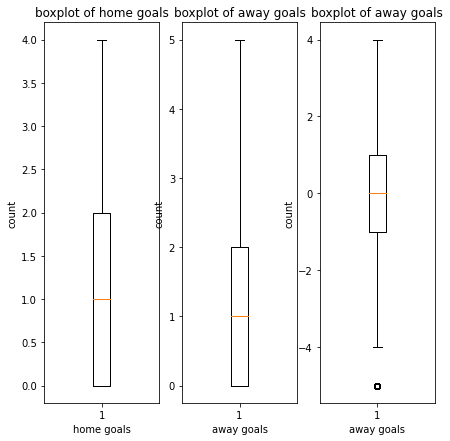

In [20]:
#we will plot thw boxplot again to confirm if the outliers have been deleted

plt.figure(figsize=(7,7))
#subplot 1
plt.subplot(131)
plt.title('boxplot of home goals')
plt.boxplot(results['home_score'])
plt.xlabel('home goals')
plt.ylabel('count')

#subplot 2
plt.subplot(132)
plt.title('boxplot of away goals')
plt.boxplot(results['away_score'])
plt.xlabel('away goals')
plt.ylabel('count')

#subplot3
plt.subplot(133)
plt.title('boxplot of away goals')
plt.boxplot(results['goal_difference'])
plt.xlabel('away goals')
plt.ylabel('count')

plt.show()

In [21]:
#to look at the dtypes of the two new variables that we created
results.dtypes

date               datetime64[ns]
home_team                  object
away_team                  object
home_score                  int64
away_score                  int64
tournament                 object
city                       object
country                    object
neutral                      bool
year                       object
month                      object
goal_difference             int64
matchstatus                object
dtype: object

#### Uniformity

In [22]:
results.columns=results.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')

results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'goal_difference', 'matchstatus'],
      dtype='object')

### FiFa Ranking Data Cleaning

##### Consistency

In [23]:
#we will look for the number of rows with duplicate records
print('number of rows with duplicated values',fifaranking.duplicated().sum())

#we then drop the rows with duplicated records
fifaranking.drop_duplicates(inplace=True)
print('\n to confirm if the duplicated rows have been dropped')
print('number of rows with duplicated values',fifaranking.duplicated().sum())

print('shape of dataframe after deleting duplicated rows', fifaranking.shape)

number of rows with duplicated values 37

 to confirm if the duplicated rows have been dropped
number of rows with duplicated values 0
shape of dataframe after deleting duplicated rows (57756, 16)


##### Completness

In [24]:
#look for columns with missing values
fifaranking.isna().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

##### Uniformity

In [25]:
#rename the rank_date into date
fifaranking.rename(columns={'rank_date':'date'},inplace=True)
# we will rename the columns into a uniform naming convention
# we will use the pascal case
fifaranking.columns=fifaranking.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')


#confirm if the code above has been implemented
fifaranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date'],
      dtype='object')

##### Validity

In [26]:
#converting the dtype of the column date from object to datetime
fifaranking['date']=pd.to_datetime(fifaranking['date'],infer_datetime_format=True)

In [27]:
# we will create a new column with year values
fifaranking['year']=fifaranking['date'].dt.strftime('%Y')
fifaranking['month']=fifaranking['date'].dt.strftime('%m')

In [28]:
#we will drop some of the columns that might be unecessary
fifaranking.drop(['country_abrv','previous_points','rank_change','cur_year_avg_weighted','last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted'],axis=1,inplace=True)
fifaranking.columns

Index(['rank', 'country_full', 'total_points', 'cur_year_avg', 'confederation',
       'date', 'year', 'month'],
      dtype='object')

# MERGING THE TWO DATASETS

In [29]:
#we will first rank the records in both tables using the datecolumns
#sort the records in the fifa rankings dataframe using the date column
fifaranking1=fifaranking.copy()
fifaranking.sort_values('date',inplace=True)
fifaranking1.sort_values('date',inplace=True)
fifaranking1=fifaranking
#sort the records in the results dataframe using the date column
results.sort_values('date',inplace=True)

In [30]:
print('*** year column in results dataset')
print(results['date'].describe())

print('*** year column in fifa ranking dataset')
print(fifaranking['date'].describe())


#we can see that the records in both tables started at different times
#in the results dataset, the records began in 1872
#in the fifaranking dataset, the records were made from 1993

*** year column in results dataset
count                   37626
unique                  14319
top       2012-02-29 00:00:00
freq                       62
first     1872-11-30 00:00:00
last      2019-07-20 00:00:00
Name: date, dtype: object
*** year column in fifa ranking dataset
count                   57756
unique                    286
top       2017-04-06 00:00:00
freq                      211
first     1993-08-08 00:00:00
last      2018-06-07 00:00:00
Name: date, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """


In [31]:
#we will drop the records in the results dataset that were recorded before the year 1993
results.drop(results.loc[results['year']<'1993'].index,inplace=True)

#to confirm if this values have been dropped
results.date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """


count                   21926
unique                   5481
top       2012-02-29 00:00:00
freq                       62
first     1993-01-01 00:00:00
last      2019-07-20 00:00:00
Name: date, dtype: object

In [32]:
#to confirm if the countries in results dataframe are also in fifarankings dataframe
fifaranking['country_full'].isin(results['home_team']).value_counts()

True     53015
False     4741
Name: country_full, dtype: int64

In [33]:
#rename the country full name in the fifa ranking dataset 
fifaranking.rename(columns={'country_full':'home_team'},inplace=True)

In [34]:
fifaranking1.head()

,rank,home_team,total_points,cur_year_avg,confederation,date,year,month
0,1,Germany,0.0,0.0,UEFA,1993-08-08,1993,08
107,108,Lebanon,0.0,0.0,AFC,1993-08-08,1993,08
108,109,South Africa,0.0,0.0,CAF,1993-08-08,1993,08
109,110,Luxembourg,0.0,0.0,UEFA,1993-08-08,1993,08
110,111,Faroe Islands,0.0,0.0,UEFA,1993-08-08,1993,08


In [35]:
merged=pd.merge(fifaranking,results,how='right',on=['home_team','year','month'])
merged.rename(columns={'rank':'home_rank'},inplace=True)

In [36]:
print('looking for number of null values in the columns in the first dataset\n', merged.isna().sum())
#we will drop the null values
merged.dropna(inplace=True)

print('shape of merged', merged.shape)

looking for number of null values in the columns in the first dataset
 home_rank          4528
home_team             0
total_points       4528
cur_year_avg       4528
confederation      4528
date_x             4528
year                  0
month                 0
date_y                0
away_team             0
home_score            0
away_score            0
tournament            0
city                  0
country               0
neutral               0
goal_difference       0
matchstatus           0
dtype: int64
shape of merged (17450, 18)


In [37]:
fifaranking.rename(columns={'home_team':'away_team'},inplace=True)
merged1=pd.merge(fifaranking,results,how='right',on=['away_team','year','month'])
merged1.rename(columns={'rank':'away_rank'},inplace=True)

In [38]:
print('looking for number of null values in the columns in the first dataset\n', merged1.isna().sum())
#we will drop the null values
merged1.dropna(inplace=True)

print('shape of merged', merged1.shape)

looking for number of null values in the columns in the first dataset
 away_rank          4590
away_team             0
total_points       4590
cur_year_avg       4590
confederation      4590
date_x             4590
year                  0
month                 0
date_y                0
home_team             0
home_score            0
away_score            0
tournament            0
city                  0
country               0
neutral               0
goal_difference       0
matchstatus           0
dtype: int64
shape of merged (17388, 18)


In [39]:
merged3=pd.merge(merged,merged1,how='inner',left_on=['away_team','year','month'],right_on=['away_team','year','month'])

In [40]:
#getting the shape of the resulting final dataset
merged3.shape

(26173, 33)

In [41]:
#look for number of null values in the columns
merged3.isna().sum()
merged3=merged3.dropna()
merged3.isna().sum()

home_rank            0
home_team_x          0
total_points_x       0
cur_year_avg_x       0
confederation_x      0
date_x_x             0
year                 0
month                0
date_y_x             0
away_team            0
home_score_x         0
away_score_x         0
tournament_x         0
city_x               0
country_x            0
neutral_x            0
goal_difference_x    0
matchstatus_x        0
away_rank            0
total_points_y       0
cur_year_avg_y       0
confederation_y      0
date_x_y             0
date_y_y             0
home_team_y          0
home_score_y         0
away_score_y         0
tournament_y         0
city_y               0
country_y            0
neutral_y            0
goal_difference_y    0
matchstatus_y        0
dtype: int64

In [42]:
#looking for columns with duplicated values
print('number of duplicated records',merged3.duplicated().sum())

number of duplicated records 0


In [43]:
merged3.head(2)

,home_rank,home_team_x,total_points_x,cur_year_avg_x,confederation_x,date_x_x,year,month,date_y_x,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,goal_difference_x,matchstatus_x,away_rank,total_points_y,cur_year_avg_y,confederation_y,date_x_y,date_y_y,home_team_y,home_score_y,away_score_y,tournament_y,city_y,country_y,neutral_y,goal_difference_y,matchstatus_y
0,19.0,Colombia,0.0,0.0,CONMEBOL,1993-08-08,1993,08,1993-08-01,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,0,Draw,67.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-01,Colombia,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,0,Draw
1,19.0,Colombia,0.0,0.0,CONMEBOL,1993-08-08,1993,08,1993-08-01,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,0,Draw,67.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-29,Argentina,0,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,0,Draw


In [44]:
#we will drop some of the columns
#most of this columns have been duplicated
merged3.drop(['total_points_x','cur_year_avg_x','date_x_x','date_y_x','city_x','country_x','neutral_y','matchstatus_y','goal_difference_y','country_y','city_y','total_points_y','cur_year_avg_y','date_x_y','date_y_y','home_team_y','home_score_y','away_score_y','tournament_y','confederation_y'],axis=1,inplace=True)
merged3.columns

Index(['home_rank', 'home_team_x', 'confederation_x', 'year', 'month',
       'away_team', 'home_score_x', 'away_score_x', 'tournament_x',
       'neutral_x', 'goal_difference_x', 'matchstatus_x', 'away_rank'],
      dtype='object')

In [45]:
merged3.head(2)

,home_rank,home_team_x,confederation_x,year,month,away_team,home_score_x,away_score_x,tournament_x,neutral_x,goal_difference_x,matchstatus_x,away_rank
0,19.0,Colombia,CONMEBOL,1993,08,Paraguay,0,0,FIFA World Cup qualification,False,0,Draw,67.0
1,19.0,Colombia,CONMEBOL,1993,08,Paraguay,0,0,FIFA World Cup qualification,False,0,Draw,67.0


In [46]:
merged3.rename(columns={'home_team_x':'home_team','confederation_x':'confederation','home_score_x':'home_score','away_score_x':'away_score','tournament_x':'tournament','neutral_x':'neutral','goal_difference_x':'goal_difference','matchstatus_x':'matchstatus'},inplace=True)

In [47]:
merged3.describe().T

,count,mean,std,min,25%,50%,75%,max
home_rank,26173.0,77.402590,50.272251,1.0,35.0,73.0,112.0,209.0
home_score,26173.0,1.359684,1.157080,0.0,0.0,1.0,2.0,4.0
away_score,26173.0,1.063424,1.116182,0.0,0.0,1.0,2.0,5.0
goal_difference,26173.0,0.296260,1.688020,-5.0,-1.0,0.0,1.0,4.0
away_rank,26173.0,77.879991,50.619766,1.0,36.0,72.0,113.0,209.0


# ANALYSIS

##Univariate Analysis

##### Match Status

In [48]:
merged3.head(2)

,home_rank,home_team,confederation,year,month,away_team,home_score,away_score,tournament,neutral,goal_difference,matchstatus,away_rank
0,19.0,Colombia,CONMEBOL,1993,08,Paraguay,0,0,FIFA World Cup qualification,False,0,Draw,67.0
1,19.0,Colombia,CONMEBOL,1993,08,Paraguay,0,0,FIFA World Cup qualification,False,0,Draw,67.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


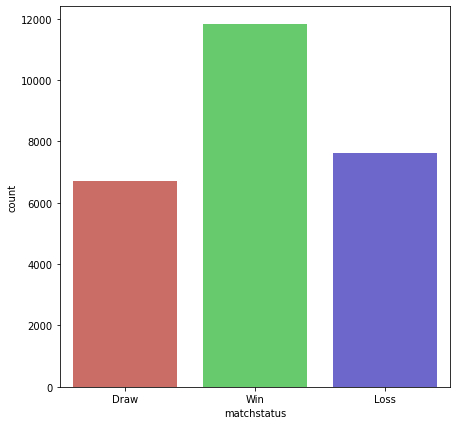

In [49]:
plt.figure(figsize=(7,7))
sns.countplot(merged3['matchstatus'],palette='hls')
plt.show()

##### Goals scored by home team

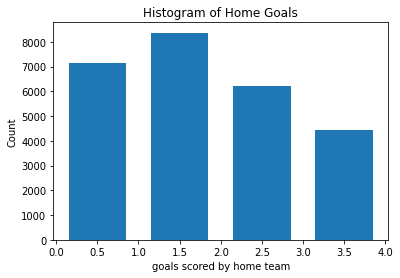

In [50]:
home_goals = merged3['home_score']

plt.hist(home_goals, bins=4, histtype='bar', rwidth=0.7)

plt.xlabel('goals scored by home team')
plt.ylabel('Count')
plt.title('Histogram of Home Goals') 
plt.show()

##### Goals by away team

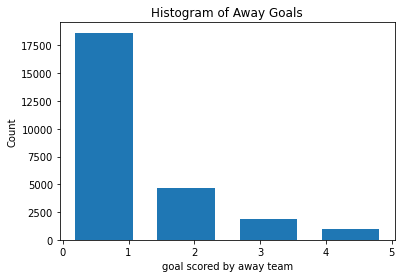

In [51]:
away_goals=merged3['away_score']
plt.hist(away_goals, bins=4, histtype='bar', rwidth=0.7)

plt.xlabel('goal scored by away team')
plt.ylabel('Count')
plt.title('Histogram of Away Goals') 
plt.show()

##### tournament type

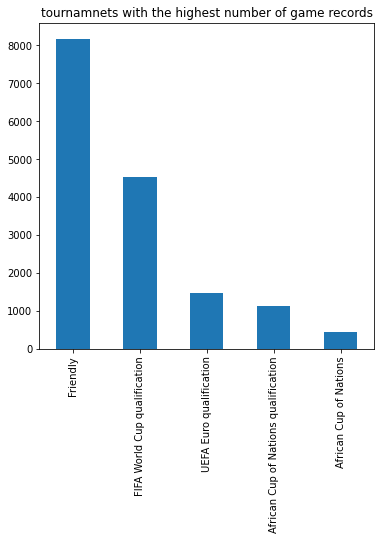

In [52]:
results.tournament.value_counts().head(5).plot(kind='bar',figsize=(6,6))
plt.title('tournamnets with the highest number of game records')
plt.show()

##### Home Team

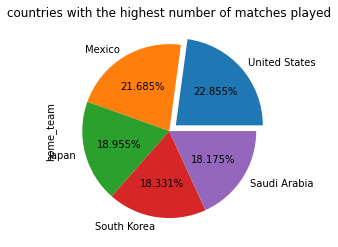

In [53]:
explode=0.1,0,0,0,0
results.home_team.value_counts().head(5).plot(kind='pie',autopct='%1.3f%%',explode=explode)
plt.title('countries with the highest number of matches played')
plt.show()

## Bivariate Analysis

##### numerical variables

In [54]:
#to filter the dataset to have columns with numerical values
numerical=merged3.select_dtypes(exclude='object')
numerical.drop('neutral',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


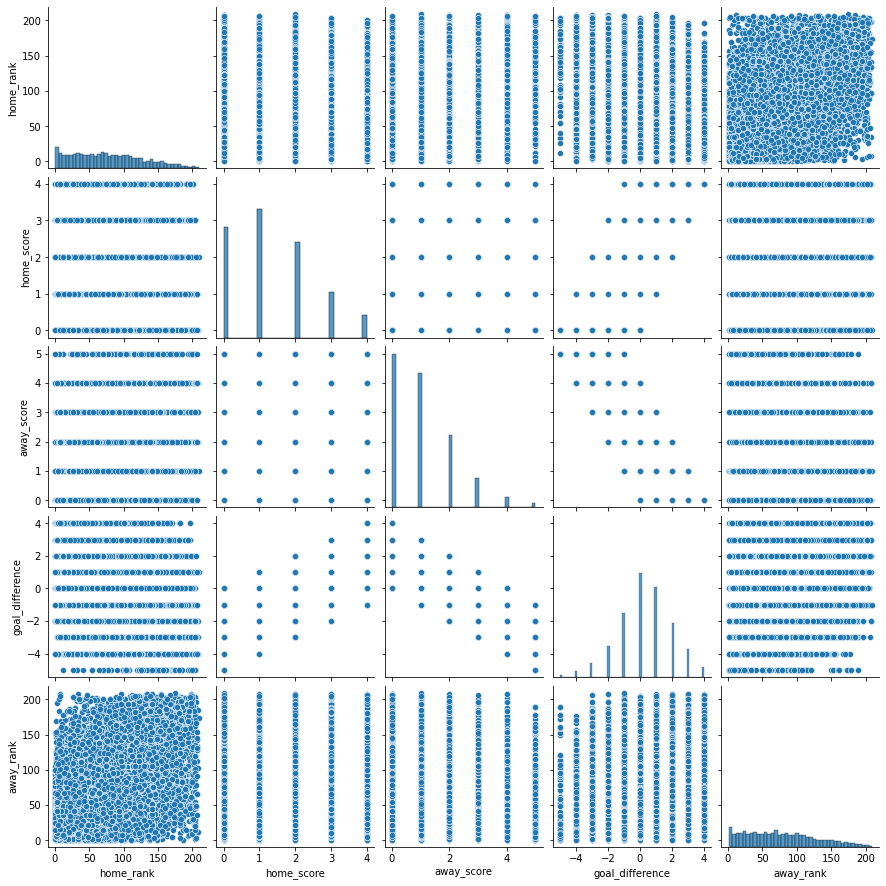

In [55]:
sns.pairplot(numerical)
plt.show()

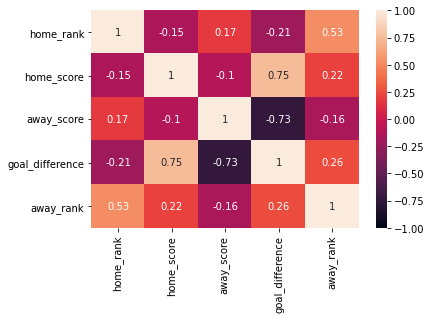

In [56]:
#correlation matrix
sns.heatmap(numerical.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

#from the correlation matrix below, we can see that the highest correlation was between goal difference and home score, followed by goal difference and away score

##### categorical-numerical Variables

In [57]:
objects=merged3.select_dtypes(include='object')
objects.columns

Index(['home_team', 'confederation', 'year', 'month', 'away_team',
       'tournament', 'matchstatus'],
      dtype='object')

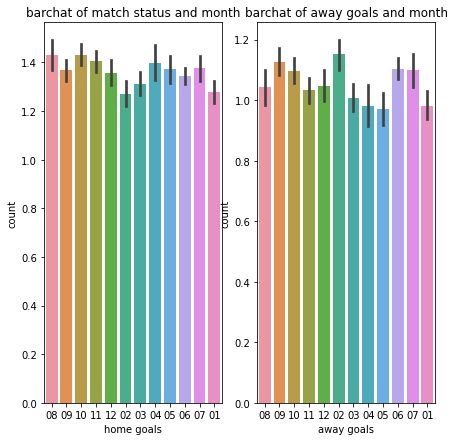

In [58]:
plt.figure(figsize=(7,7))
#subplot 1
plt.subplot(121)
plt.title('barchat of match status and month')
sns.barplot(x=merged3['month'],y=merged3['home_score'])
plt.xlabel('home goals')
plt.ylabel('count')

#subplot 2
plt.subplot(122)
plt.title('barchat of away goals and month')
sns.barplot(x=merged3['month'],y=merged3['away_score'])
plt.xlabel('away goals')
plt.ylabel('count')

plt.show()

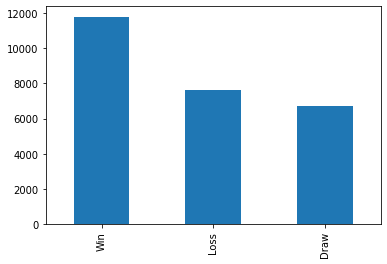

In [59]:
# match status
merged3['matchstatus'].value_counts().plot(kind='bar')
plt.show()

## Multivariate Analysis

We will perform LDA 

LDA is linear discriminant analysis. It helps us to chose the features that explain the dependent variable.

It helps us have a parsimonious model

In [60]:
#To use LDA, we have to encode all the variables
#this is because LDA model can only read numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
merged3.home_team=le.fit_transform(merged3.home_team)
merged3.away_team=le.fit_transform(merged3.away_team)
merged3.tournament=le.fit_transform(merged3.tournament)
merged3.neutral=le.fit_transform(merged3.neutral)
merged3.matchstatus=le.fit_transform(merged3.matchstatus)
merged3.confederation=le.fit_transform(merged3.confederation)

##### LDA for Logisitc Regression

##### using lda to chose the variables that will be important in helping us in logisitc regression

In [61]:
#define independent (X) and dependent (y) variables
X=merged3[['home_team', 'away_team', 'home_score', 'away_score','away_rank','tournament','neutral','home_rank','confederation','goal_difference']]
y=merged3['matchstatus']

In [62]:
#We will pefrom LDA and get its results
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA()
lda_=lda.fit(X,y)
lda_x=lda_.transform(X)
lda_.coef_

array([[ 3.84910404e-04, -2.51416716e-04, -4.73296290e-01,
        -2.18038054e-01, -1.56027168e-03, -1.06878032e-03,
        -1.57766684e-02, -2.49085505e-04, -3.86612768e-02,
        -2.96018361e-01],
       [ 3.61890837e-04,  1.04639245e-03, -7.91600965e-01,
         1.19080458e+00, -2.13377738e-03,  3.12159494e-03,
         1.68247095e-01,  3.71888400e-03,  5.12933936e-02,
        -2.10174123e+00],
       [-4.52731428e-04, -5.33521694e-04,  7.80754079e-01,
        -6.45848744e-01,  2.26624950e-03, -1.41041435e-03,
        -9.97941674e-02, -2.26245642e-03, -1.11824014e-02,
         1.52691517e+00]])

In [63]:
#the reults are in array type
#we will convert them into a dataframe
result=pd.DataFrame(index=X.columns.values,data=lda_.coef_[0])
result.rename(columns={0:'coefficients from LDA'},inplace=True)
result.sort_values(by='coefficients from LDA',ascending=False)

,coefficients from LDA
home_team,0.000385
home_rank,-0.000249
away_team,-0.000251
tournament,-0.001069
away_rank,-0.001560
neutral,-0.015777
confederation,-0.038661
away_score,-0.218038
goal_difference,-0.296018
home_score,-0.473296


In [64]:
merged3.head(2)

,home_rank,home_team,confederation,year,month,away_team,home_score,away_score,tournament,neutral,goal_difference,matchstatus,away_rank
0,19.0,41,3,1993,08,137,0,0,26,0,0,0,67.0
1,19.0,41,3,1993,08,137,0,0,26,0,0,0,67.0


##### LDA for Home Goals

In [65]:
#define independent (X) and dependent (y) variables
X1=merged3[['home_team', 'away_team','away_score','away_rank','tournament','neutral','home_rank','confederation','matchstatus']]
y1=merged3['home_score']

In [66]:
#We will pefrom LDA and get its results
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA()
lda_=lda.fit(X1,y1)
lda_x=lda_.transform(X1)
lda_.coef_

array([[-1.05505807e-04,  4.35132893e-05, -2.11808233e-01,
        -1.12252076e-02,  1.15688363e-03,  2.43565222e-01,
         1.20430998e-02,  2.55665621e-02, -1.20855430e+00],
       [ 2.03350726e-04,  1.80574909e-04, -7.23547391e-02,
        -2.25569662e-03,  8.41544671e-04,  2.00099325e-02,
         1.15697134e-03, -1.67172531e-02, -3.98268921e-01],
       [ 9.92878012e-05, -3.16180901e-04,  1.51381446e-01,
         4.67182480e-03, -7.16483053e-04, -9.64099859e-02,
        -5.62667770e-03, -1.14710552e-02,  8.13634658e-01],
       [-4.39979509e-04,  2.75893231e-04,  2.44095609e-01,
         1.28601735e-02, -1.22981643e-03, -3.08189709e-01,
        -1.20412299e-02, -1.13500125e-02,  1.48548936e+00],
       [-1.78138009e-04, -4.56840626e-04,  3.08000320e-01,
         2.17166717e-02, -4.90969063e-03, -2.68081151e-01,
        -1.70281706e-02,  4.25382176e-02,  1.69973202e+00]])

In [67]:
#the reults are in array type
#we will convert them into a dataframe
result=pd.DataFrame(index=X1.columns.values,data=lda_.coef_[0])
result.rename(columns={0:'coefficients from LDA'},inplace=True)
result.sort_values(by='coefficients from LDA',ascending=False)

,coefficients from LDA
neutral,0.243565
confederation,0.025567
home_rank,0.012043
tournament,0.001157
away_team,0.000044
home_team,-0.000106
away_rank,-0.011225
away_score,-0.211808
matchstatus,-1.208554


In [68]:
#the important features in explaining home goals are
# neutral,confederation,home_rank,tournament,away_team

##### LDA for away goals

In [69]:
#define independent (X) and dependent (y) variables
X2=merged3[['home_team', 'away_team','home_score','away_rank','tournament','neutral','home_rank','confederation','matchstatus']]
y2=merged3['away_score']

In [70]:
#We will pefrom LDA and get its results
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA()
lda_=lda.fit(X2,y2)
lda_x=lda_.transform(X2)
lda_.coef_

array([[-1.01847123e-04,  1.52074423e-05, -2.93889657e-01,
         8.52762944e-03, -1.31481758e-03, -3.26419884e-01,
        -8.71905579e-03, -2.72607635e-02,  6.05526303e-01],
       [-2.31624284e-04,  7.06120369e-05,  1.34308340e-01,
        -2.08552690e-05,  1.03493111e-03, -1.31545824e-02,
        -6.10894408e-04, -1.25686259e-02, -2.88584756e-01],
       [ 5.66529628e-05,  2.22742036e-04,  2.77927563e-01,
        -8.10847677e-03, -1.97241035e-04,  3.54980669e-01,
         8.06368854e-03,  4.00873951e-02, -5.84688620e-01],
       [ 5.75121073e-04, -3.13790604e-04,  2.57959624e-01,
        -1.46080731e-02,  7.63859694e-04,  5.02549211e-01,
         1.59692347e-02,  7.13086671e-02, -3.95540718e-01],
       [ 1.79472918e-03, -2.21922609e-03, -2.33657439e-02,
        -1.90959084e-02,  7.50476154e-03,  7.83290756e-01,
         2.34379551e-02,  5.67926316e-02, -6.21254956e-02],
       [ 1.63163973e-03,  1.15578281e-03, -6.42398026e-02,
        -2.19833751e-02, -5.97404459e-03,  7.845019

In [71]:
#the reults are in array type
#we will convert them into a dataframe
result=pd.DataFrame(index=X2.columns.values,data=lda_.coef_[0])
result.rename(columns={0:'coefficients from LDA'},inplace=True)
result.sort_values(by='coefficients from LDA',ascending=False)

,coefficients from LDA
matchstatus,0.605526
away_rank,0.008528
away_team,0.000015
home_team,-0.000102
tournament,-0.001315
home_rank,-0.008719
confederation,-0.027261
home_score,-0.293890
neutral,-0.326420


In [72]:
#the importan featurees in predicitng home score 
#matchstatus,away_rank,away_team

# Modelling

### Logistic Regression

In [73]:
#Defining our new X variables
X=merged3[['home_team', 'home_rank','away_team','tournament','away_rank','neutral']].values
y=merged3['matchstatus'].values

#Train and test
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#calling the function
le=LogisticRegression()
le.fit(X_train, y_train)
#predict
y_pred=le.predict(X_test)
#Compare and show
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Actual,Predicted
0,2,1
1,2,1
2,1,2
3,2,1
4,2,2
...,...,...
5230,2,2
5231,2,2
5232,2,2
5233,2,2


In [74]:
#Evaluate the performance of the model
score_metric=le.score(X_test,y_test)
print('Model Accuracy: %.2f%%' %(score_metric*100) )

print('********')
confusionMatrix=confusion_matrix(y_test,y_pred)
confusionMatrix

Model Accuracy: 55.13%
********


array([[   0,  433,  883],
       [   0,  935,  612],
       [   0,  421, 1951]])

From the confusion matrix above, we can see that the model was not able to predict accurately

i.e the values of false negative and false positive were high

### CROSS VALIDATION 

In [75]:
kf=KFold(n_splits=10,random_state=100,shuffle=True)
model_kfold=LogisticRegression()
from sklearn import model_selection
results_kfold=model_selection.cross_val_score(model_kfold,X,y,cv=kf)
print('Model Accuracy: %.2f%%' %(results_kfold.mean()*100) )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model Accuracy: 55.04%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Polynomial Regression

##### Goals scored by home Team

In [76]:
X1=merged3[['neutral','confederation','home_rank','tournament','away_team']]
y1=merged3['home_score']

In [77]:
#calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['feature']=X1.columns
#calculating vif for each feature
vif_data['VIF']=[variance_inflation_factor(X1.values,i)
for i in range(len(X1.columns))]

print(vif_data)

#all columns have a vif of below 5
#this is implies that there is no multicolinearity among them

         feature       VIF
0        neutral  1.405982
1  confederation  2.619885
2      home_rank  2.685497
3     tournament  4.372044
4      away_team  3.319507


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [78]:
X1.corr()

#the is no high correlation between the variables
#this means that there is no multicolinarity among them
#multicolliniarity occurs where the independnent variables are correlated

,neutral,confederation,home_rank,tournament,away_team
neutral,1.000000,-0.121631,-0.010957,-0.066956,0.052265
confederation,-0.121631,1.000000,-0.366863,0.368751,-0.108077
home_rank,-0.010957,-0.366863,1.000000,-0.111621,0.055919
tournament,-0.066956,0.368751,-0.111621,1.000000,-0.039881
away_team,0.052265,-0.108077,0.055919,-0.039881,1.000000


In [79]:
X1_train,y1_train,X1_test,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=42)
pr=PolynomialFeatures(degree=4)
le=LinearRegression()
X1_poly=pr.fit_transform(X1)
pr=le
pr.fit(X1_poly,y1)

#to predict
y_pred=pr.predict(X1_poly)
#to evaluatet the model

from sklearn.metrics import mean_squared_error,r2_score
rmse=np.sqrt(mean_squared_error(y,y_pred))
r2=r2_score(y,y_pred)

print('r-squared',r2)
print('root mean squared error',rmse)
print('mean of our dependent variable',merged3['home_score'].mean())

#the rmse is above half of the mean of our dependnent variable
#this means that our model is not appropriate to predict the goals scored by the away team

r-squared -0.04907240176474592
root mean squared error 0.8384817087728996
mean of our dependent variable 1.3596836434493562


##### Goals Scored by Away Team

In [80]:
X2=merged3[['matchstatus','away_rank','away_team']]
y2=merged3['away_score']

In [81]:
#calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['feature']=X2.columns
#calculating vif for each feature
vif_data['VIF']=[variance_inflation_factor(X2.values,i)
for i in range(len(X2.columns))]

print(vif_data)

#vifs are below 5
#this implies that there is no multicollinearity amogst them

       feature       VIF
0  matchstatus  2.622409
1    away_rank  2.783328
2    away_team  2.615867


In [82]:
X2.corr()

#the is no high correlation between the variables
#this means that there is no multicolinarity among them
#multicolliniarity occurs where the independnent variables are correlated

,matchstatus,away_rank,away_team
matchstatus,1.000000,0.168386,-0.012237
away_rank,0.168386,1.000000,0.013918
away_team,-0.012237,0.013918,1.000000


In [83]:
X1_train,y1_train,X1_test,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=42)
pr=PolynomialFeatures(degree=4)
le=LinearRegression()
X1_poly=pr.fit_transform(X1)
pr=le
pr.fit(X1_poly,y1)

#to predict
y_pred=pr.predict(X1_poly)
#to evaluatet the model

from sklearn.metrics import mean_squared_error,r2_score
rmse=np.sqrt(mean_squared_error(y,y_pred))
r2=r2_score(y,y_pred)

print('r-squared',r2)
print('root mean squared error',rmse)
print('mean of the independnet variable',merged3['away_score'].mean())

#the rmse is above half of the mean of our dependnent variable
#this means that our model is not appropriate to predict the goals scored by the away team

r-squared -0.04907240176474592
root mean squared error 0.8384817087728996
mean of the independnet variable 1.0634241393802775
